## LIBRERIAS

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import scipy.optimize as optimize
import datetime

import fix_yahoo_finance as yf
import requests
import urllib.request
import time

## LECTURA DE DATOS

Leo los datos de cotizaciones y ratios de las empresas

Se extraen los datos de las cotizaciones diarias de las acciones del archivo `cotizaciones.csv` y los ratios de noticias y sentimientos del archivo `Datos adicionales.csv`. Para poder combinar los dos archivos, se hace un preprocesado del las etiquetas de las acciones para que coincidan en ambos dataframes. También se cambiá el indice para que tenga formato fecha.

In [7]:
activos_nasdaq = pd.read_csv('./data/activos_nasdaq.csv')
activos_nasdaq['Date'] = pd.to_datetime(activos_nasdaq['Date'], format="%Y-%m-%d")
activos_nasdaq = activos_nasdaq.set_index('Date')
activos_nasdaq = activos_nasdaq.iloc[:,:-1]
activos_nasdaq

,MELI UW Equity,CDW UW Equity,AMZN UW Equity,ALXN UW Equity,BMRN UW Equity,GOOG UW Equity,VRSN UW Equity,CSCO UW Equity,MSFT UW Equity,EBAY UW Equity,...,GILD UW Equity,SGEN UW Equity,TTWO UW Equity,BIIB UW Equity,VRTX UW Equity,PAYX UW Equity,INTU UW Equity,TCOM UW Equity,BIDU UW Equity,CTXS UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-29,126.692297,34.195179,380.471212,153.838431,102.071591,486.548043,56.835418,25.741642,43.472804,21.959082,...,90.667290,31.076054,21.612346,313.241665,109.665597,43.273428,89.657119,28.373403,194.059192,48.347943
2015-04-30,126.120753,33.955928,373.745599,149.957247,99.289190,476.145052,56.277166,25.546696,43.100635,21.727895,...,89.063422,30.429190,21.000926,305.201943,109.240261,42.879107,88.903921,28.213903,177.471119,47.388369
2015-05-01,128.796820,34.266068,374.711465,152.854843,102.718455,476.641277,56.844279,25.812531,43.113927,22.113887,...,93.050940,30.154495,21.585762,315.233651,111.296048,43.286719,89.134311,28.267070,179.411711,47.233121
2015-05-04,134.928736,34.398986,374.862104,151.791505,103.072901,479.193288,57.083531,25.847976,42.746189,22.044858,...,93.626915,30.305134,21.665513,315.233651,111.916329,43.765222,89.754592,28.426570,180.501632,47.134320
2015-05-05,132.199502,34.443291,373.222791,149.354689,100.946225,470.349860,55.692330,25.599863,42.179076,21.606675,...,91.260987,31.014026,21.328789,314.890725,108.238951,43.499387,88.620365,27.908193,172.562042,46.760379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,747.951978,99.165133,2189.625694,105.376800,95.159894,1268.757228,194.085776,41.027126,162.008412,40.052400,...,66.600406,140.910013,120.706590,267.119377,253.996013,63.755977,256.929054,22.950379,94.902920,129.948770
2020-06-02,761.855123,100.370250,2190.839672,103.037456,95.992842,1275.314479,192.632547,41.549934,163.851531,40.743569,...,64.916787,142.505020,119.271084,268.368799,251.895921,64.881343,254.474516,23.614966,95.018115,127.485370
2020-06-03,756.316904,101.982979,2196.147501,100.813307,98.544853,1272.797913,189.593173,41.594240,164.250283,41.160043,...,65.926959,137.392136,114.574674,268.138409,245.462726,66.272543,257.061971,24.766915,99.643636,123.675075


In [8]:
indicadores = pd.read_excel('./data/Datos Acciones renta variable.xlsx', sheet_name='Hoja2')
len(indicadores)

44

In [9]:
indicadores = indicadores.set_index('Ticker')
indicadores

,Price,OPER_MARGIN,RETURN_ON_INV_CAPITAL,ROC_WACC_RATIO,OPERATING_ROIC,OPER_INC_TO_TOT_DEBT,CUR_MKT_CAP,PE_RATIO,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO,Unnamed: 13,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC,Unnamed: 18,TWITTER_SENTIMENT,NEWS_SENTIMENT
Ticker,,,,,,,,,,,,,,,,,,,,
MELI UW Equity,866.93,-6.669863,-7.835844,-0.466724,-5.466515,-0.150538,4.309505e+10,-,23.0879,189.608,-330.771,-,NaN,3.869565,23,12,2,NaN,0.415005,-0.342350
CDW UW Equity,125.34,6.286462,19.492927,2.192339,25.143969,0.325888,1.783815e+10,23.6838,20.0471,18.0812,19.2488,24.912,NaN,3.800000,10,5,1,NaN,0.297486,0.009725
AMZN UW Equity,2483.00,5.183551,4.500000,1.299721,11.393006,0.187541,1.238461e+12,118.634,18.9824,30.95,13.4429,0,NaN,4.745454,55,50,1,NaN,-0.033902,0.449071
ALXN UW Equity,115.21,42.483621,17.732685,1.980240,1.420000,0.767510,2.544153e+10,12.0687,2.16831,11.6339,2977.14,0,NaN,4.360000,25,17,0,NaN,0.197014,-0.402494
BMRN UW Equity,105.80,-5.895198,2.837115,0.395703,1.500000,-0.110438,1.913254e+10,133.534,5.90273,215.855,70.4545,-,NaN,4.538462,26,20,0,NaN,0.118857,-0.212550
GOOG UW Equity,1438.39,21.148915,14.847055,1.899500,17.027738,2.143859,9.824010e+11,-,-,-,12.1438,0,NaN,5.000000,15,15,0,NaN,-0.257270,0.425929
VRSN UW Equity,211.28,65.450396,214.100405,30.761191,1.340000,0.448656,2.441118e+10,33.5895,-,33.2933,0.779727,0,NaN,3.000000,4,1,1,NaN,-0.497409,0.116456
CSCO UW Equity,47.83,27.394806,18.245801,2.558312,24.375592,0.576462,2.019524e+11,16.7,5.65259,13.0481,13050,51.45,NaN,3.800000,30,14,2,NaN,0.453963,0.048053
MSFT UW Equity,187.20,34.136980,23.872039,2.672929,27.060648,0.496894,1.419620e+12,33.0435,12.409,24.5726,137.674,35.9506,NaN,4.783784,37,33,0,NaN,0.317293,0.024876


In [10]:
indicadores = indicadores.loc[activos_nasdaq.columns, ['TWITTER_SENTIMENT', 'EQY_REC_CONS']]
indicadores

,TWITTER_SENTIMENT,EQY_REC_CONS
MELI UW Equity,0.415005,3.869565
CDW UW Equity,0.297486,3.800000
AMZN UW Equity,-0.033902,4.745454
ALXN UW Equity,0.197014,4.360000
BMRN UW Equity,0.118857,4.538462
GOOG UW Equity,-0.257270,5.000000
VRSN UW Equity,-0.497409,3.000000
CSCO UW Equity,0.453963,3.800000
MSFT UW Equity,0.317293,4.783784
EBAY UW Equity,-0.308413,3.406250


### PREFERENCIA DE ANALISTAS

La primera estrategia que voy a calcular es las de recomendación por analístas, para ello elimino los registros que tienen ratio 0 al considerar que es por falta de informacion.

In [11]:
ratios = indicadores
ratios

,TWITTER_SENTIMENT,EQY_REC_CONS
MELI UW Equity,0.415005,3.869565
CDW UW Equity,0.297486,3.800000
AMZN UW Equity,-0.033902,4.745454
ALXN UW Equity,0.197014,4.360000
BMRN UW Equity,0.118857,4.538462
GOOG UW Equity,-0.257270,5.000000
VRSN UW Equity,-0.497409,3.000000
CSCO UW Equity,0.453963,3.800000
MSFT UW Equity,0.317293,4.783784
EBAY UW Equity,-0.308413,3.406250


In [12]:
brok_df = ratios[ratios['EQY_REC_CONS'] != 0]
brok_df

,TWITTER_SENTIMENT,EQY_REC_CONS
MELI UW Equity,0.415005,3.869565
CDW UW Equity,0.297486,3.800000
AMZN UW Equity,-0.033902,4.745454
ALXN UW Equity,0.197014,4.360000
BMRN UW Equity,0.118857,4.538462
GOOG UW Equity,-0.257270,5.000000
VRSN UW Equity,-0.497409,3.000000
CSCO UW Equity,0.453963,3.800000
MSFT UW Equity,0.317293,4.783784
EBAY UW Equity,-0.308413,3.406250


Genero un ranking según la recomendación del analista

In [13]:
brok_df['ranking'] = brok_df['EQY_REC_CONS'].rank(axis=0, method='first', ascending=False).astype(int)

In [14]:
brok_df.shape

(41, 3)

Debido a que solo poseo la informacion de 41 cotizaciones establezco que voy a comprar las 10 acciones con mejor recomendación y vender las 10 acciones con peor recomendacion de los analistas

In [15]:
longWeight = 1
shortWeight = -1
longRank = 10
shortRank = 10
n = brok_df.iloc[:,-1].max()

In [16]:
brok_df['weigths'] = np.where(brok_df['ranking']<=longRank,longWeight/longRank, 
                       np.where(brok_df['ranking']>(n-shortRank),shortWeight/shortRank,0))

In [17]:
brok_df

,TWITTER_SENTIMENT,EQY_REC_CONS,ranking,weigths
MELI UW Equity,0.415005,3.869565,29,0.0
CDW UW Equity,0.297486,3.800000,32,-0.1
AMZN UW Equity,-0.033902,4.745454,5,0.1
ALXN UW Equity,0.197014,4.360000,15,0.0
BMRN UW Equity,0.118857,4.538462,9,0.1
GOOG UW Equity,-0.257270,5.000000,1,0.1
VRSN UW Equity,-0.497409,3.000000,40,-0.1
CSCO UW Equity,0.453963,3.800000,33,-0.1
MSFT UW Equity,0.317293,4.783784,3,0.1
EBAY UW Equity,-0.308413,3.406250,37,-0.1


Creo un dataframe con las rentabilidades de las acciones sobre las que ha realizado el ranking

In [18]:
rentabilidades = activos_nasdaq[brok_df.index.to_list()].pct_change().dropna()
rentabilidades.head()

,MELI UW Equity,CDW UW Equity,AMZN UW Equity,ALXN UW Equity,BMRN UW Equity,GOOG UW Equity,VRSN UW Equity,CSCO UW Equity,MSFT UW Equity,EBAY UW Equity,...,GILD UW Equity,SGEN UW Equity,TTWO UW Equity,BIIB UW Equity,VRTX UW Equity,PAYX UW Equity,INTU UW Equity,TCOM UW Equity,BIDU UW Equity,CTXS UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,-0.004511,-0.006997,-0.017677,-0.025229,-0.027259,-0.021381,-0.009822,-0.007573,-0.008561,-0.010528,...,-0.017690,-0.020816,-0.028290,-0.025666,-0.003878,-0.009112,-0.008401,-0.005621,-0.085479,-0.019847
2015-05-01,0.021218,0.009134,0.002584,0.019323,0.034538,0.001042,0.010077,0.010406,0.000308,0.017765,...,0.044772,-0.009027,0.027848,0.032869,0.018819,0.009506,0.002591,0.001884,0.010935,-0.003276
2015-05-04,0.047609,0.003879,0.000402,-0.006957,0.003451,0.005354,0.004209,0.001373,-0.008529,-0.003121,...,0.006190,0.004996,0.003695,0.000000,0.005573,0.011054,0.006959,0.005643,0.006075,-0.002092
2015-05-05,-0.020227,0.001288,-0.004373,-0.016054,-0.020633,-0.018455,-0.024371,-0.009599,-0.013267,-0.019877,...,-0.025270,0.023392,-0.015542,-0.001088,-0.032858,-0.006074,-0.012637,-0.018236,-0.043986,-0.007934
2015-05-06,-0.004558,-0.005917,-0.004962,-0.080332,0.050737,-0.012396,0.007796,0.002769,-0.027731,-0.007681,...,-0.006991,0.064857,0.002077,-0.005805,0.006386,-0.001833,-0.004700,0.005398,-0.024083,-0.006489


In [19]:
# genero los resultados como un indice de base 100
resultados_analista = [100]

# voy calculado los resultados como el anterior mas 1 por la rentabilidad que se obtienen diariamente de las
# distintas acciones y sus pesos
for i in range(1, len(rentabilidades)):
    value = resultados_analista[i-1] * (1 + (rentabilidades.iloc[i-1] * brok_df['weigths'].values).sum())
    resultados_analista.append(value)
resultados_analistas = pd.DataFrame(resultados_analista, columns=['analistas'])  
resultados_analistas.set_index(rentabilidades.index, inplace=True)

In [20]:
resultados_analistas.head()

,analistas
Date,
2015-04-30,100.000000
2015-05-01,99.490904
2015-05-04,98.460766
2015-05-05,98.538153
2015-05-06,98.084064


In [21]:
resultados_analistas.to_csv('./data_resultante/analistas_nasdaq.csv')

### SENTIMIENTO EN TWITTER

La segunda estrategia esta basada en un dindicador de sentimieno dee mercado. Como el numero de valores ausentes en los datos de sentimiento de twitter he decidido usar únicamente el indicados de noticias

In [22]:
ratios.head()

,TWITTER_SENTIMENT,EQY_REC_CONS
MELI UW Equity,0.415005,3.869565
CDW UW Equity,0.297486,3.800000
AMZN UW Equity,-0.033902,4.745454
ALXN UW Equity,0.197014,4.360000
BMRN UW Equity,0.118857,4.538462


In [23]:
ratios.shape

(41, 2)

Al igual que la estrategia anterior, me quedo únicamente con los valores distintos a 0 al suponer que son valores ausentes y no se puede establecer un ranking con ellos

In [24]:
sent_df = ratios[ratios['TWITTER_SENTIMENT'] != 0]

In [25]:
sent_df.head()

,TWITTER_SENTIMENT,EQY_REC_CONS
MELI UW Equity,0.415005,3.869565
CDW UW Equity,0.297486,3.800000
AMZN UW Equity,-0.033902,4.745454
ALXN UW Equity,0.197014,4.360000
BMRN UW Equity,0.118857,4.538462


Genero un ranking según el sentimiento de las noticias

In [26]:
sent_df['ranking'] = sent_df['TWITTER_SENTIMENT'].rank(axis=0, method='first', ascending=False).astype(int)

Como en el caso anterior establezco que voy a comprar las 10 acciones con mejor recomendación y vender las 10 acciones con peor recomendacion de los analistas

In [27]:
longWeight = 1
shortWeight = -1
longRank = 10
shortRank = 10
n = sent_df.iloc[:,-1].max()

In [28]:
sent_df['weigths'] = np.where(sent_df['ranking']<=longRank,longWeight/longRank, 
                       np.where(sent_df['ranking']>(n-shortRank),shortWeight/shortRank,0))

In [29]:
sent_df

,TWITTER_SENTIMENT,EQY_REC_CONS,ranking,weigths
MELI UW Equity,0.415005,3.869565,4,0.1
CDW UW Equity,0.297486,3.800000,9,0.1
AMZN UW Equity,-0.033902,4.745454,20,0.0
ALXN UW Equity,0.197014,4.360000,13,0.0
BMRN UW Equity,0.118857,4.538462,15,0.0
GOOG UW Equity,-0.257270,5.000000,31,0.0
VRSN UW Equity,-0.497409,3.000000,39,-0.1
CSCO UW Equity,0.453963,3.800000,1,0.1
MSFT UW Equity,0.317293,4.783784,8,0.1
EBAY UW Equity,-0.308413,3.406250,32,-0.1


Creo un dataframe con las rentabilidades de las acciones sobre las que ha realizado el ranking

In [30]:
rentabilidades_sent = activos_nasdaq[sent_df.index.to_list()].pct_change().dropna()
rentabilidades_sent.head()

,MELI UW Equity,CDW UW Equity,AMZN UW Equity,ALXN UW Equity,BMRN UW Equity,GOOG UW Equity,VRSN UW Equity,CSCO UW Equity,MSFT UW Equity,EBAY UW Equity,...,GILD UW Equity,SGEN UW Equity,TTWO UW Equity,BIIB UW Equity,VRTX UW Equity,PAYX UW Equity,INTU UW Equity,TCOM UW Equity,BIDU UW Equity,CTXS UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,-0.004511,-0.006997,-0.017677,-0.025229,-0.027259,-0.021381,-0.009822,-0.007573,-0.008561,-0.010528,...,-0.017690,-0.020816,-0.028290,-0.025666,-0.003878,-0.009112,-0.008401,-0.005621,-0.085479,-0.019847
2015-05-01,0.021218,0.009134,0.002584,0.019323,0.034538,0.001042,0.010077,0.010406,0.000308,0.017765,...,0.044772,-0.009027,0.027848,0.032869,0.018819,0.009506,0.002591,0.001884,0.010935,-0.003276
2015-05-04,0.047609,0.003879,0.000402,-0.006957,0.003451,0.005354,0.004209,0.001373,-0.008529,-0.003121,...,0.006190,0.004996,0.003695,0.000000,0.005573,0.011054,0.006959,0.005643,0.006075,-0.002092
2015-05-05,-0.020227,0.001288,-0.004373,-0.016054,-0.020633,-0.018455,-0.024371,-0.009599,-0.013267,-0.019877,...,-0.025270,0.023392,-0.015542,-0.001088,-0.032858,-0.006074,-0.012637,-0.018236,-0.043986,-0.007934
2015-05-06,-0.004558,-0.005917,-0.004962,-0.080332,0.050737,-0.012396,0.007796,0.002769,-0.027731,-0.007681,...,-0.006991,0.064857,0.002077,-0.005805,0.006386,-0.001833,-0.004700,0.005398,-0.024083,-0.006489


In [31]:
# genero los resultados como un indice de base 100
resultados_sentimiento = [100]

# voy calculado los resultados como el anterior mas 1 por la rentabilidad que se obtienen diariamente de las
# distintas acciones y sus pesos
for i in range(1, len(resultados_analista)):
    value = resultados_analista[i-1] * (1 + (rentabilidades_sent.iloc[i-1] * sent_df['weigths'].values).sum())
    resultados_sentimiento.append(value)
resultados_sentimiento = pd.DataFrame(resultados_sentimiento, columns=['Twitter'])  
resultados_sentimiento.set_index(rentabilidades.index, inplace=True)

In [32]:
resultados_sentimiento.tail()

,Twitter
Date,
2020-06-01,141.624633
2020-06-02,139.383390
2020-06-03,144.068393
2020-06-04,144.688370
2020-06-05,143.194217


In [33]:
resultados_sentimiento.to_csv('./data_resultante/twitter_nasdaq.csv')

### COMPARACIÓN DE LAS ESTRATÉGIAS CON Nasdaq

In [34]:
nasdaq = pd.read_csv('./data/nasdaq.csv')
nasdaq['Date'] = pd.to_datetime(nasdaq['Date'], format="%Y-%m-%d")
nasdaq = nasdaq.set_index('Date')
nasdaq

,Nasdaq,Rentabilidad,Buy&Hold
Date,,,
2015-04-30,4378.670097,NaN,100.000000
2015-05-01,4435.352217,1.294505,101.294505
2015-05-04,4445.576212,0.230511,101.528001
2015-05-05,4376.811913,-1.546803,99.957563
2015-05-06,4359.371397,-0.398475,99.559257
...,...,...,...
2020-06-01,8464.214226,0.655193,193.305594
2020-06-02,8514.125541,0.589675,194.445468
2020-06-03,8580.173012,0.775740,195.953859


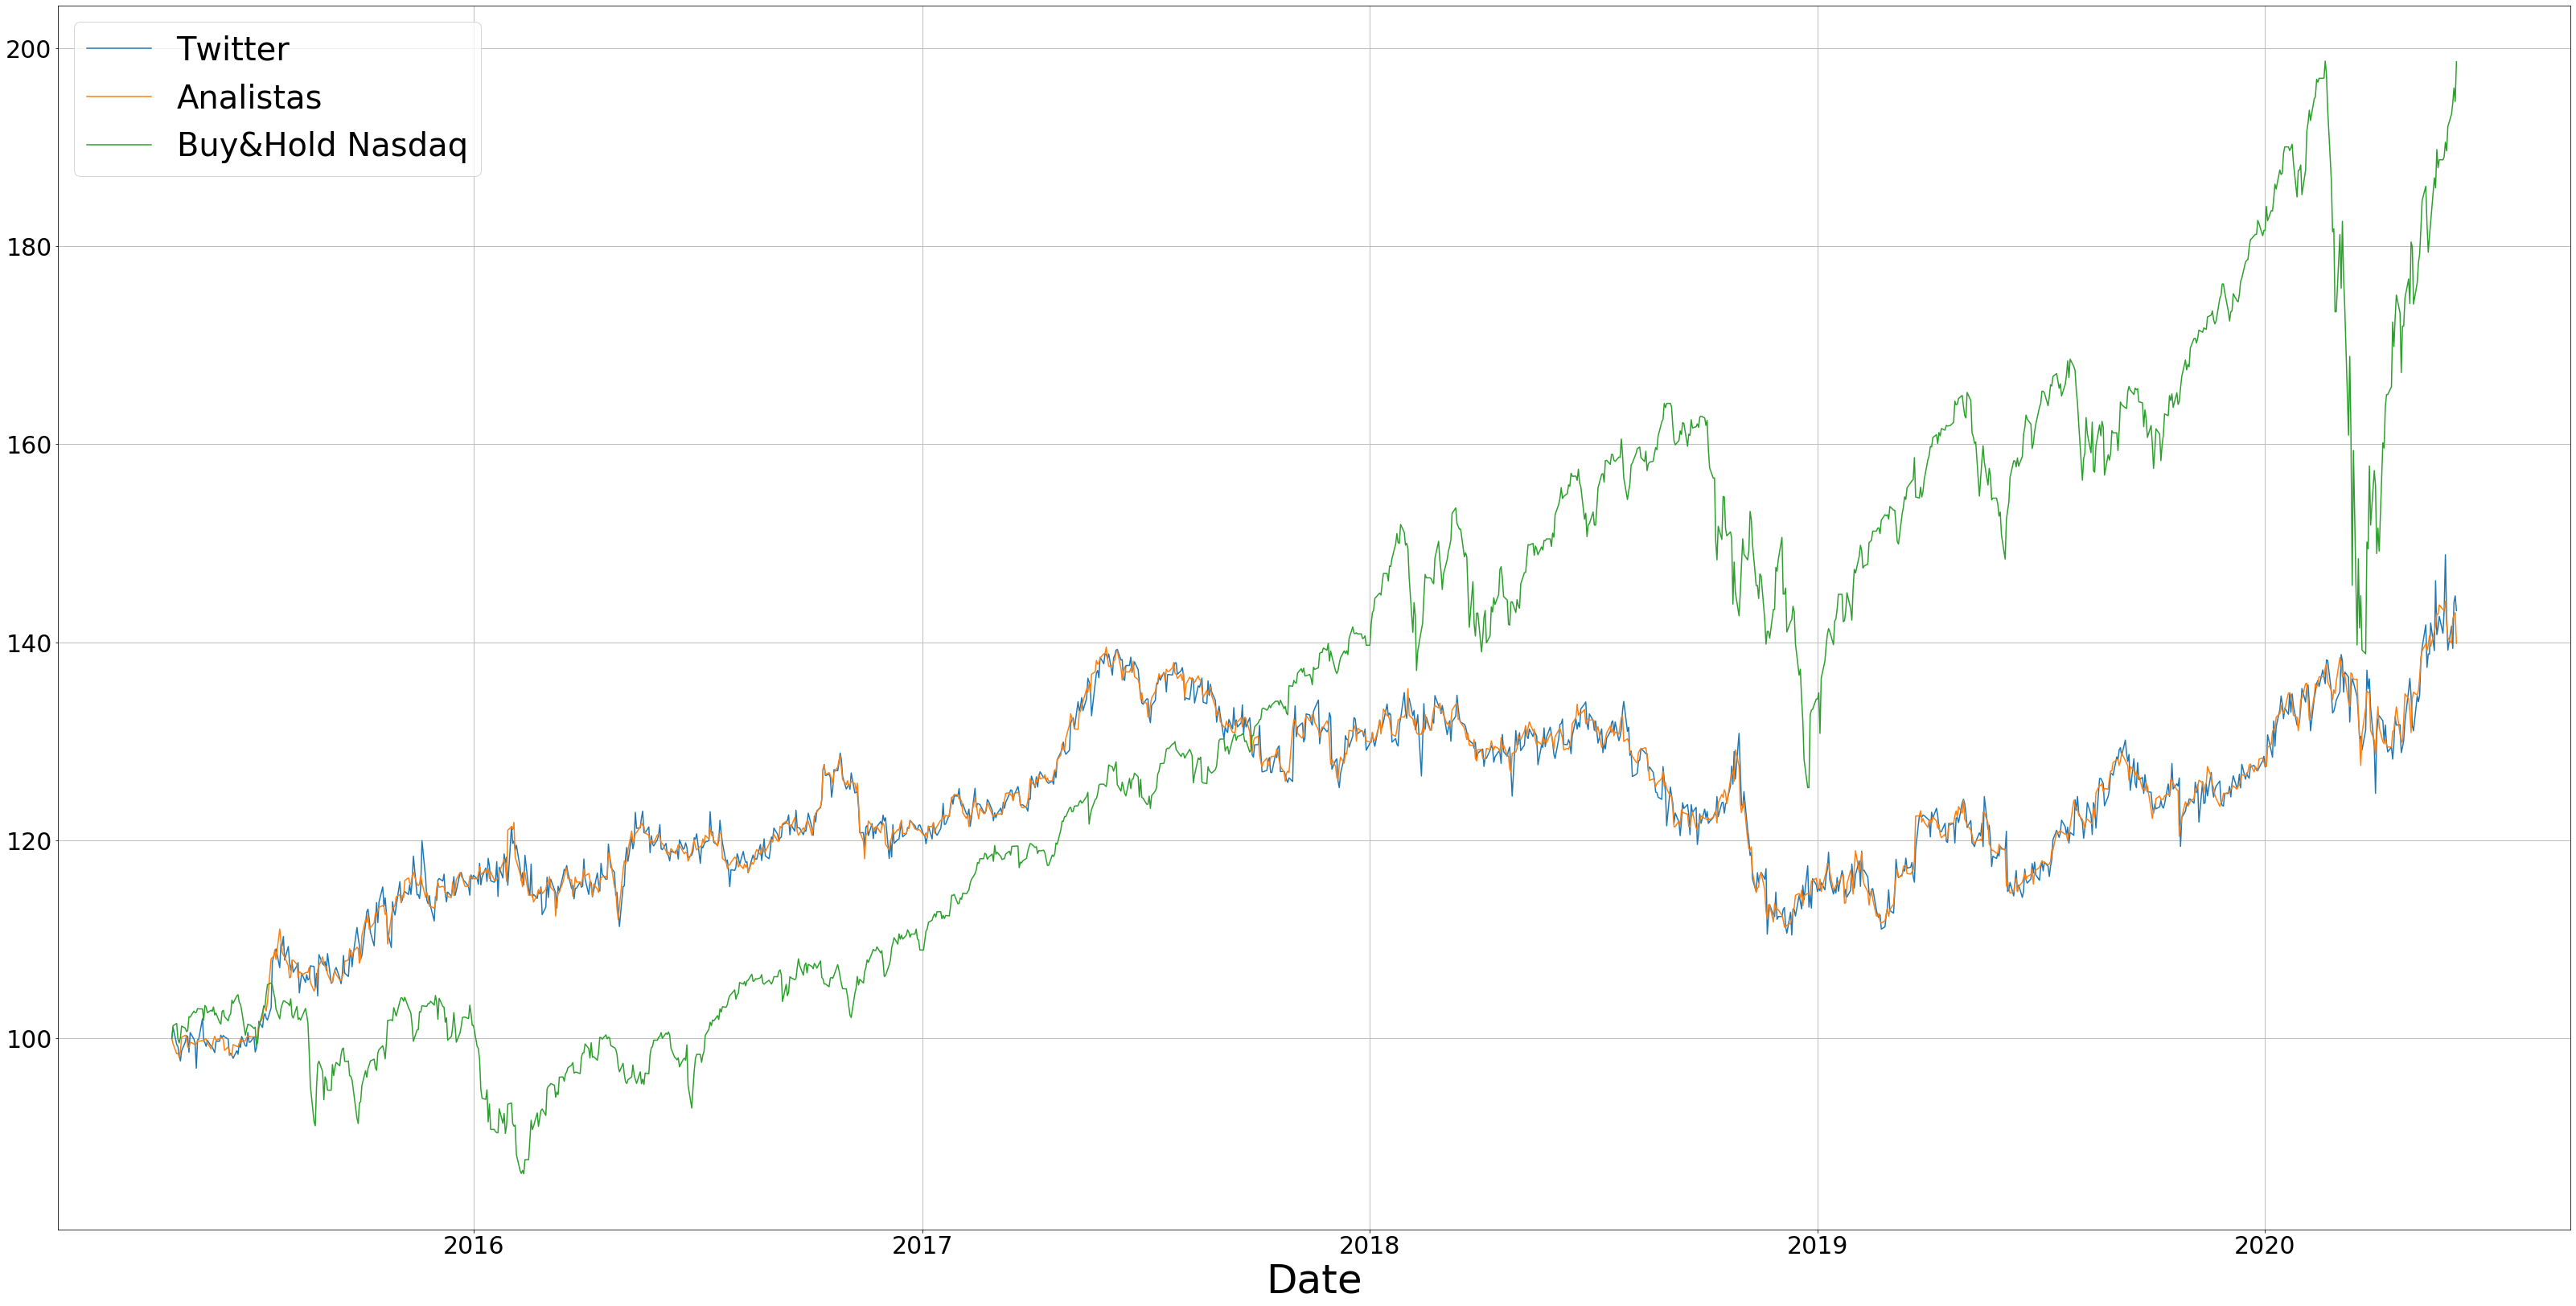

In [35]:
fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(resultados_sentimiento["Twitter"])
ax1 = plt.plot(resultados_analistas["analistas"])
ax1 = plt.plot(nasdaq["Buy&Hold"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Twitter", "Analistas", "Buy&Hold Nasdaq"], prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

Se puede ver que tanto la estratégia de la valoracion de lo analistas con la de sentimiento de mercado tienen una correlación altisima y ambas estratégias consiguieron descorrelarse de las caídas producidas a finales de 2018. 